# Object Detection with Open CV and Deep Learning

We will makae use of OpenCv's dnn Module that allows to use pretrained deep learning models for fast object detection. 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Object Detection with MobileNet Single Shot Detector(SSD)

The pretrained MobileNet SSD on coco dataset with Tensorflow and the config file can be downloaded from [here](https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API)
- We are using MobileNet-SSD v3 here
- Similarly the coco labels for the model is downloaded from [here](https://github.com/amikelive/coco-labels/blob/master/coco-labels-paper.txt)

In [5]:
# extracting the tar file
!tar xvzf ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz

x ssd_mobilenet_v3_large_coco_2020_01_14/pipeline.config
x ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.index
x ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.data-00000-of-00001
x ssd_mobilenet_v3_large_coco_2020_01_14/model.tflite
x ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb
x ssd_mobilenet_v3_large_coco_2020_01_14/checkpoint
x ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.meta
x ssd_mobilenet_v3_large_coco_2020_01_14/


In [2]:
# stating the model and the config file
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"

In [3]:
# reading the coco class labels
with open('coco_labels.txt', 'r') as file:
  class_labels = file.read().rstrip('\n').split('\n')

print(f'Number of class labels: {len(class_labels)}')
print()
print(class_labels)

Number of class labels: 91

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair bru

In [4]:
# intantiate the model with the pretrained model and the cinfig file
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [5]:
# set the model settings to process image
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True) # convert to RGB

<dnn_Model 0000018B89327C90>

In [85]:
img = cv2.imread('image3.jpg')
#img = cv2.resize(img,(420,420))

In [6]:
# function to detect the object with MobileNet SSd
def detect_object(image, model):
    img = cv2.imread(image)
    class_index, confidence, bbox = model.detect(img, confThreshold = 0.5)
    font = cv2.FONT_HERSHEY_PLAIN
    font_scale = 2

    for class_ind, conf, box in zip(class_index.flatten(), confidence.flatten(), bbox):
        cv2.rectangle(img, box, (0,255,0), 2)
        if box[1]<20:
            text_h = box[1]+20
        else:
            text_h = box[1]
        cv2.putText(img, class_labels[class_ind-1], (box[0]+10, text_h),font, 
                    fontScale=font_scale, color = (255,0,0), thickness = 2)
        #print(class_labels[class_ind-1])
    plt.figure(figsize = (8,10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


**Performing Detections on some example images**

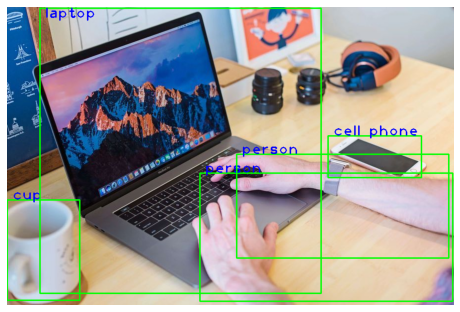

In [7]:
detect_object('image3.jpg', model)

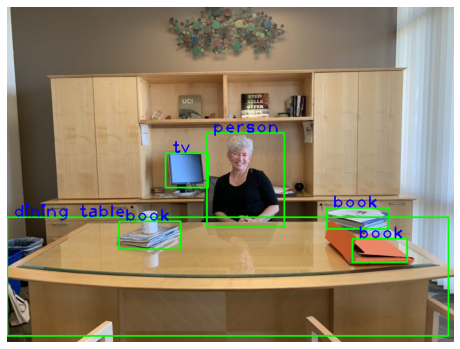

In [9]:
detect_object('image2.jpeg', model)

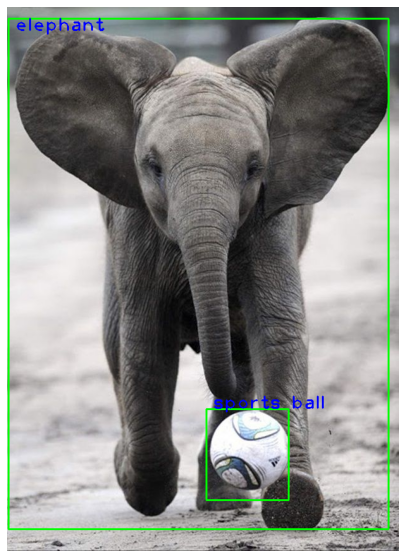

In [11]:
detect_object('image4.jpg', model)

## Object Detection with YOLOV3

Download the Required Pretrained Weights file and config file trained by the **Darknet Team**

- The pretrained yolov3 weights is downloaded from [here](https://pjreddie.com/darknet/yolo/)
- The config file for the yolov3 is downloaded from [here](https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg)
- The coco labels can be accessed at [here](https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg)

In [12]:
import os
os.chdir('yolo')

In [13]:
# getting the coco labels
# reading the coco class labels
with open('yolo_coco_labels.txt', 'r') as file:
  class_labels = file.read().rstrip('\n').split('\n')

print(f'Number of class labels: {len(class_labels)}')
print()
print(class_labels)

Number of class labels: 80

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [14]:
# stating the model and the config file
weights = "yolov3.weights"
config_file = "yolov3.cfg"

In [23]:
# # Load weights using OpenCV
net = cv2.dnn.readNetFromDarknet(config_file, weights)

In [16]:
# set the colors for showing the results
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(class_labels), 3), dtype="uint8")

In [17]:
# function to load and process an image
def load_image(image_path):
    image = cv2.imread(image_path)
    height, width = image.shape[:2]
    
    return image, height, width

In [24]:
# function to detec objects in the image
def detect_object(image, model = net):
    # getting only the output layer names from the yolo model
    layer_names = model.getLayerNames()
    layer_names = [layer_names[i[0] - 1] for i in model.getUnconnectedOutLayers()]
    # construct a blob from the input image
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416,416), swapRB = True, crop = False)
    # pass the blob through the model
    model.setInput(blob)
    outputs = model.forward(layer_names)
    
    return outputs

In [25]:
# function to get the bounding boxes of the detection results
def get_bbox(outputs,height,width):
    # initialize list of boundig boxes, confidences and class labels
    boxes = []
    confidences = []
    classIDs = []
    
    # loop over each of the layer outputs
    for output in outputs:
        # loop over each of the detections
        for detection in output:
            #extract scores, classID and confidence of the prediction
            scores = detection[5:]
            classID = np.argmax(scores)
            conf = scores[classID]

            # filter out the predictions that are below the required confidence
            if conf > 0.5:
                #get the bounding box and scale back to the original image size
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                # Use the center coordinates, width and height to get the coordinates of the top left corner
                x = int(center_x - (w / 2))
                y = int(center_y - (h / 2))

                # update the list of bounding boxes, confidences and classIDs
                boxes.append([x, y, int(w), int(h)])
                confidences.append(float(conf))
                classIDs.append(classID)
                
    return boxes, confidences, classIDs

In [26]:
# function to plot the results of object detection
def plot_results(image, boxes, confidences, classIDs):
    # set confidence and threshold for non_max_supression
    confidence = 0.5
    threshold = 0.3
    # Apply non-max supression on the detected boxes
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, confidence, threshold )
    
    # ensure at least one detection exists
    if len(idxs) > 0:
        # loop over the indexes we are keeping
        for i in idxs.flatten():
            # extract the bounding box coordinates
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])
            # draw a bounding box rectangle and label on the image
            color = [int(c) for c in COLORS[classIDs[i]]]
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            text = "{}: {:.4f}".format(class_labels[classIDs[i]], confidences[i])
            cv2.putText(image, text, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    return image
   

In [27]:
# putting all the functions for final detection results
def show_final_detections(image_path, model):
    #load_image
    image, height, width = load_image(image_path)
    #detect objects
    outputs = detect_object(image, model)
    # get bounding boxes
    boxes, confidences, classIDs = get_bbox(outputs, height, width)
    #plot the results
    plot_image = plot_results(image, boxes, confidences, classIDs)
    
    plt.figure(figsize = (10,10))
    plt.imshow(cv2.cvtColor(plot_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

**Performing the detections on some example images**

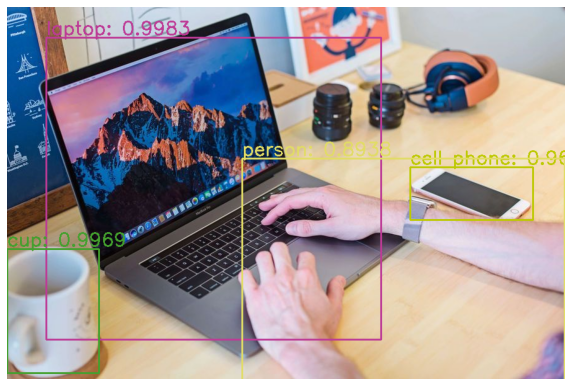

In [28]:
show_final_detections('image3.jpg', model=net)

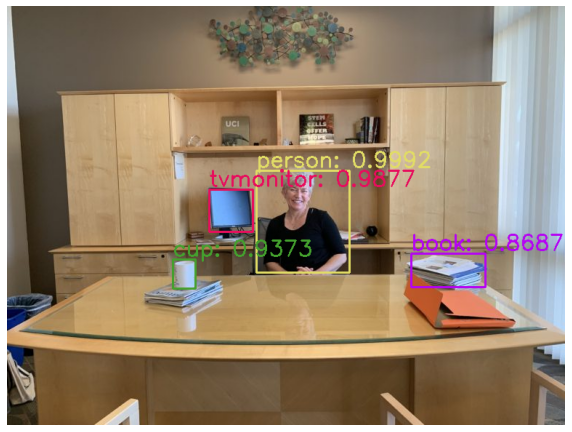

In [29]:
show_final_detections('image2.jpeg', net)

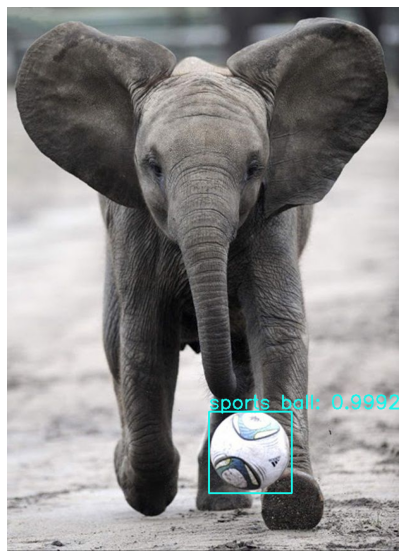

In [30]:
show_final_detections('image4.jpg', net)